# Photon Path Through the Sun
### Preview
Have you ever considered how fast it takes a single photon to travel from the center of the sun to the sun's surface?  It's much longer than you would think!  In this lab, you will see how "random walk motion" works and how it can slow down motion through a medium.  

### Intro
Random walk motion is what happens when an object travels uninterrupted for a given distance, then the object is hit, changes direction, and then moves in this new direction uninterrupted for a given distance.  

In astronomy, we call this uninterrupted travel distance the "Mean Free Path", the object is a photon, and the photon does not hit anything but instead is absorbed by a particle and emitted in a random direction.  This leads to photon path lengths that are MUCH larger than the radius of the sun (which would usually take ~2 seconds for a photon to travel if it was travelling in a straight line).  

As you are working on this lab, ask yourself these questions:

- What is a reasonable distance for the Mean Free Path?  (note: we did not use the true Mean Free Path since that would take too much computational time to complete on our computer!)
- We have two different methods for calculating the mean free path: either having it being constant, or having it increase linearly as it gets out of the sun.  Which do you think is more realistic?
- What do you think is a reasonable time for a photon to leave the sun? (note: since we used a much larger mean free path, the time estimates you find below will be WAY off!)
- What do you think the mean free path actually depends upon? Does it depend on density, radius, mass, temperature, composition, or maybe something else entirely? 
- What lesson are the KDE plots teaching you about how photons escape from stars?
- How does the star radius change the results that you recieve (such as time elapsed, distance travelled, and final iterations)? Be as detailed as you would like! Can you think of any equations or rules that would help you to extrapolate to different stars that you haven't calculated for?
- Do you get the same path each time? What changes each time?  What stays the same each time?

In [2]:
from numpy.random import random as rng # we want them random numbers
import numpy as np # for the math functions
import matplotlib.pyplot as plt # to make pretty pretty class
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.stats import gaussian_kde

Sun_radius = 6.957e8 #m
c = 3e8 #m/s, speed of light

In [3]:
def plotting_3d(x,y,z,rad):
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111, projection='3d')
    col = np.linspace(0,1,len(x))
    ax.scatter(x,y,z, c=col, cmap=cm.viridis, alpha=0.5, s=1, edgecolors='face')
    ax.scatter(x[-1], y[-1], z[-1], 'o', color='red', s=40, alpha=1)

    u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
    sx = rad*np.cos(u) * np.sin(v)
    sy = rad*np.sin(u) * np.sin(v)
    sz = rad*np.cos(v)
    ax.plot_surface(sx, sy, sz, cmap=cm.YlGnBu_r, alpha=0.2)
    plt.show()

In [7]:
def plotting_kde(d,rad):
    density = gaussian_kde(d)
    xs = np.linspace(0,rad,1000)
    density.covariance_factor = lambda : 0.2
    density._compute_covariance()
    plt.plot(xs,density(xs))
    plt.xlabel("Radius (meters)")
    plt.ylabel("Density of points given radius")
    plt.show()

Mean Free path distance : 695700.0
Final distance traveled (Sun Radius): 804.358
Time Elapsed (seconds) : 1865.306202
Final iterations : 804358


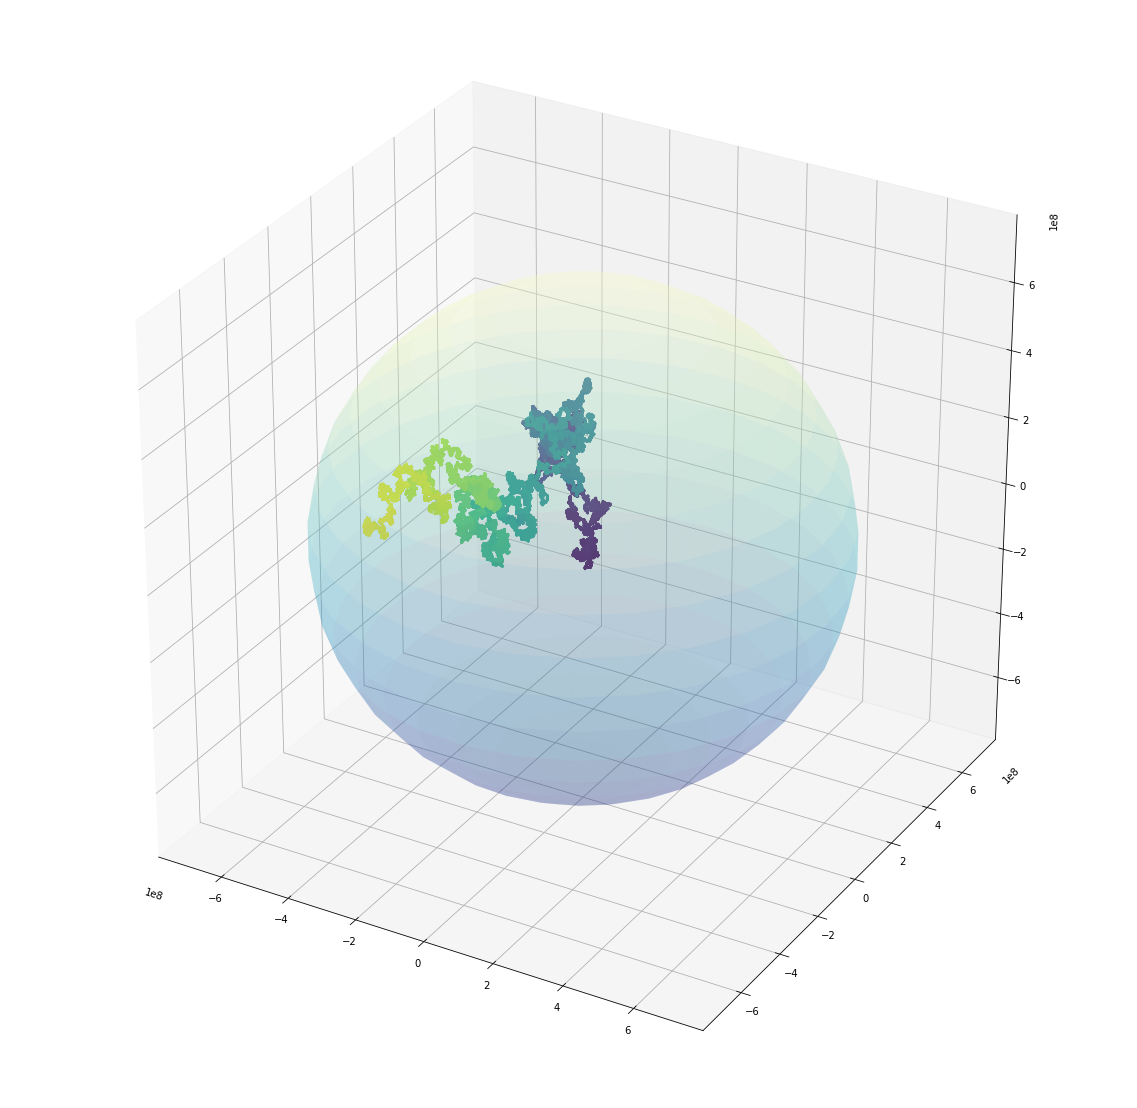

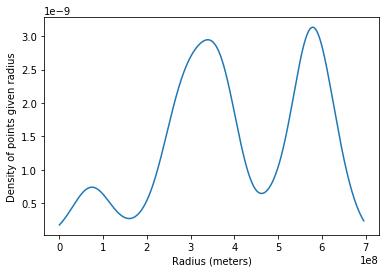

In [8]:
def Random_walk(rad):
    x = 0   
    y = 0
    z = 0
    nx = []
    ny = []
    nz = []
    
    d = 0 #tracks distance covered
    m = 0 #number of collisions
    
    Mean_Free = rad*0.001
    print("Mean Free path distance :", Mean_Free)
    
    dist_arr = []
    distance = np.sqrt(x**2 + y**2 + z**2)
    dist_arr.append(distance)
    
    while distance < rad:
        theta = np.random.uniform(0, 2*np.pi)
        phi = np.random.uniform(0, np.pi)
        x += Mean_Free*np.cos(theta)*np.sin(phi) 
        nx.append(x)
        y += Mean_Free*np.sin(theta)*np.sin(phi)
        ny.append(y)
        z += Mean_Free*np.cos(phi)
        nz.append(z)
        m += 1        
        d += Mean_Free
        distance = np.sqrt(x**2 + y**2 + z**2) 
        dist_arr.append(distance)                              
    print("Final distance traveled (Sun Radius):", d/Sun_radius)
    print("Time Elapsed (seconds) :", d/c )
    print("Final iterations :", m)
    return nx,ny,nz,dist_arr


x,y,z,d = Random_walk(Sun_radius)

plotting_3d(x,y,z,Sun_radius)
plotting_kde(d,Sun_radius)

Start Mean free path distance : 69.57
Final distance traveled (Sun Radius) : 280.758783669
Time Elapsed (seconds) : 651.079619329
Final iterations : 357641


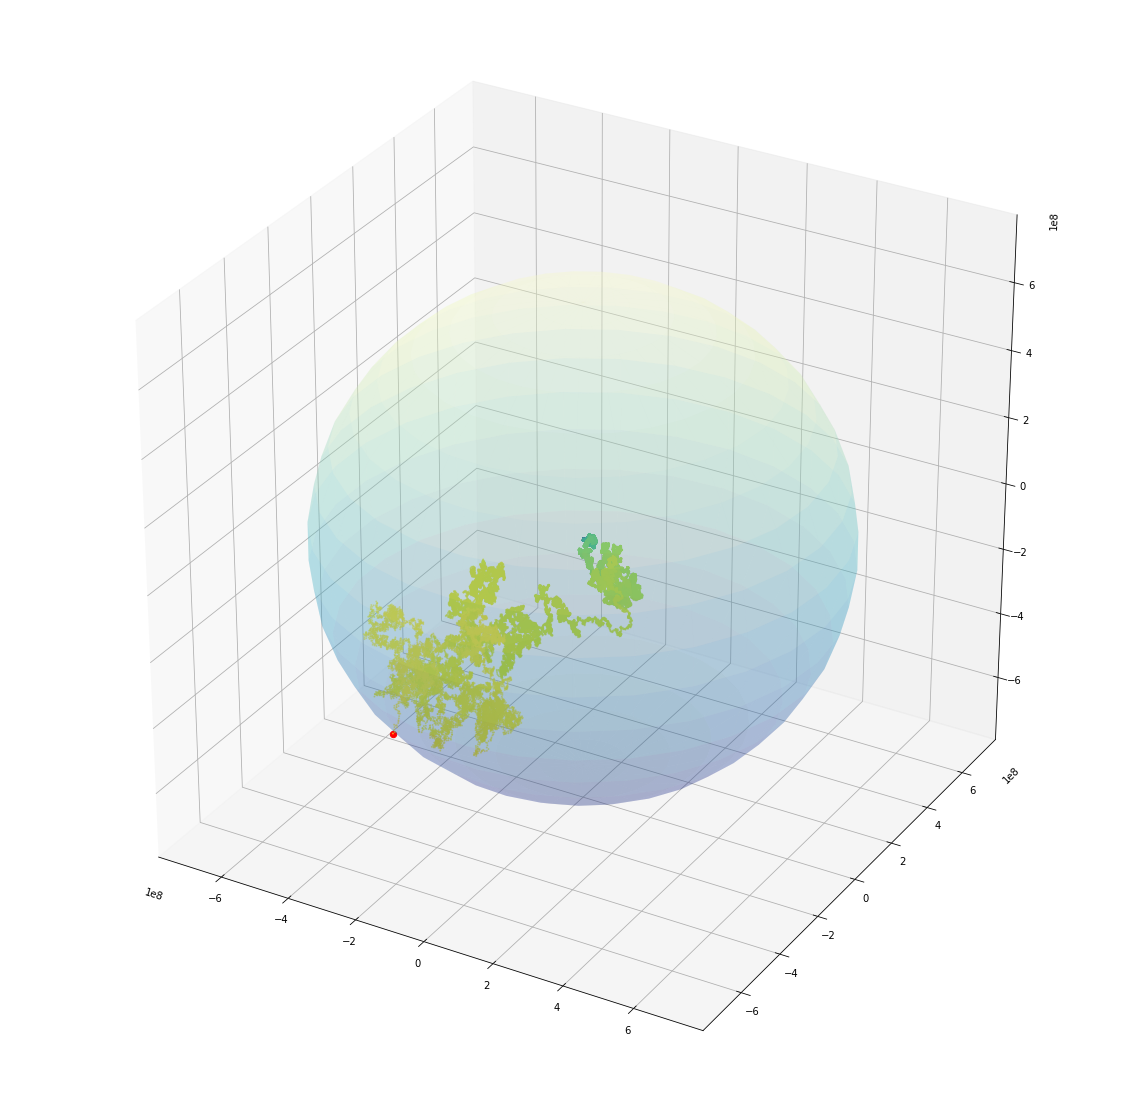

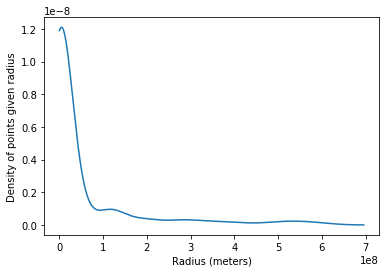

In [9]:
def Random_walk_lin(rad):
    x = 0   
    y = 0
    z = 0
    nx = []
    ny = []
    nz = []
    distance = np.sqrt(x**2 + y**2 + z**2)
    Mean_Free = Sun_radius*0.0000001 + distance*0.01 #starting kick
    print("Start Mean free path distance :", Mean_Free)
    
    d = 0 #tracking the distance covered
    m = 0 #number of collisions
    
    dist_arr = []
    
    dist_arr.append(distance)
    
    while distance < rad:
        theta = np.random.uniform(0, 2*np.pi)
        phi = np.random.uniform(0, np.pi)
        x += Mean_Free*np.cos(theta)*np.sin(phi) 
        nx.append(x)
        y += Mean_Free*np.sin(theta)*np.sin(phi)
        ny.append(y)
        z += Mean_Free*np.cos(phi)
        nz.append(z)
        m += 1  
        distance = np.sqrt(x**2 + y**2 + z**2) 
        dist_arr.append(distance)
        d += Mean_Free
        Mean_Free = Sun_radius*0.0000001 + distance*0.01
                          
    print("Final distance traveled (Sun Radius) :", d/Sun_radius)
    print("Time Elapsed (seconds) :", d/c )
    print("Final iterations :", m)
    return nx,ny,nz,dist_arr


x,y,z,d = Random_walk_lin(Sun_radius)

plotting_3d(x,y,z,Sun_radius)
plotting_kde(d,Sun_radius)

Start Mean free path distance : 69.57
Final distance traveled (Sun Radius) : 37.8246266249
Time Elapsed (seconds) : 87.7153091432
Final iterations : 554425


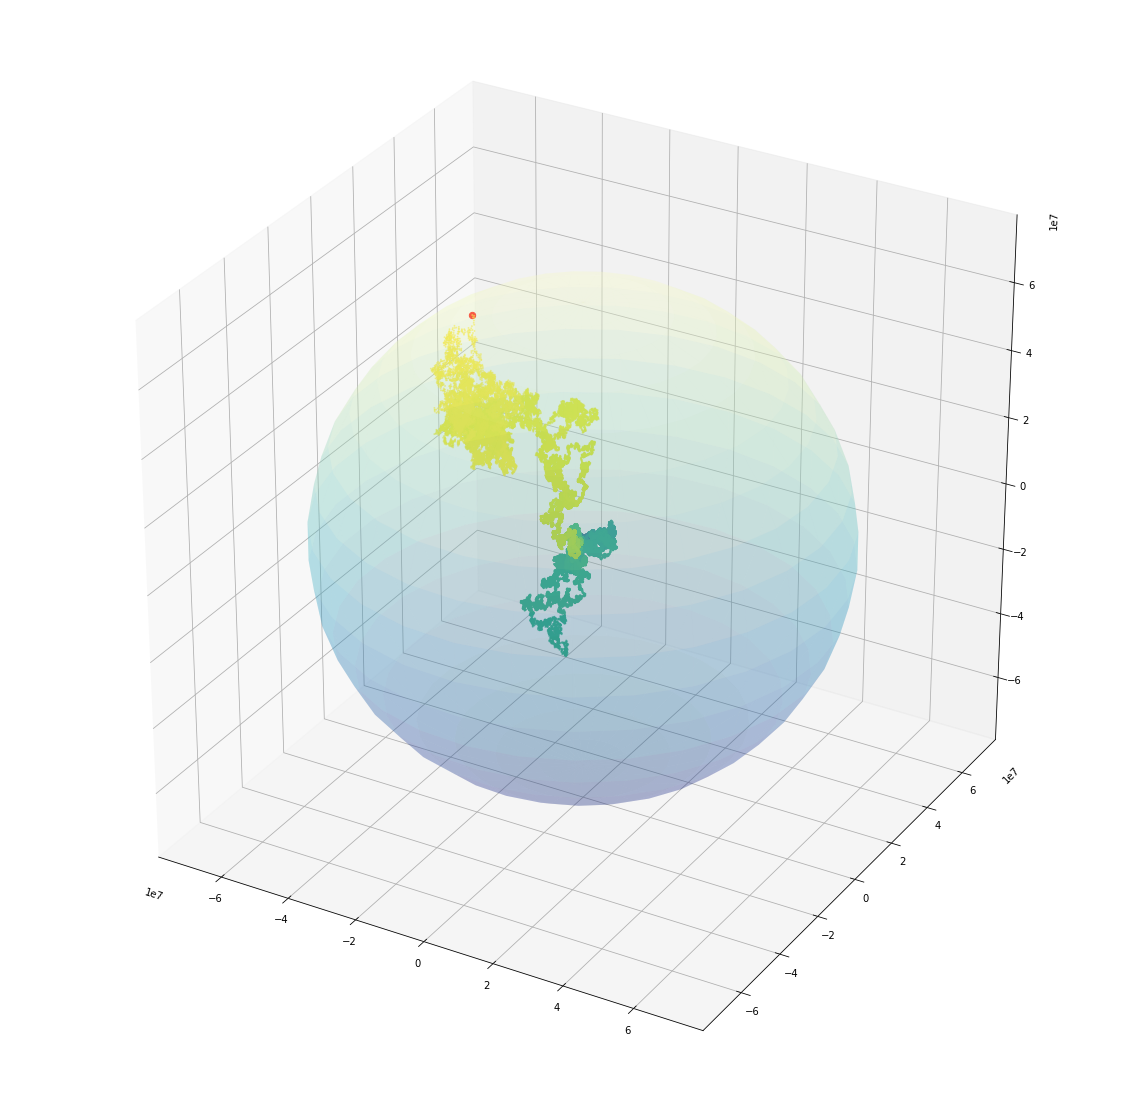

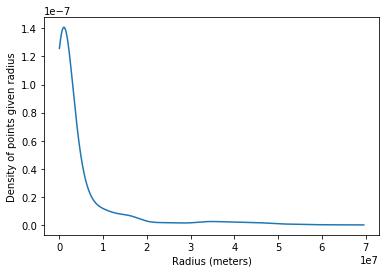

In [10]:
Sun_radius_tenth = Sun_radius*0.1
x,y,z,d = Random_walk_lin(Sun_radius_tenth)

plotting_3d(x,y,z,Sun_radius_tenth)
plotting_kde(d,Sun_radius_tenth)

Start Mean free path distance : 69.57
Final distance traveled (Sun Radius) : 1191.64359812
Time Elapsed (seconds) : 2763.42150404
Final iterations : 707772


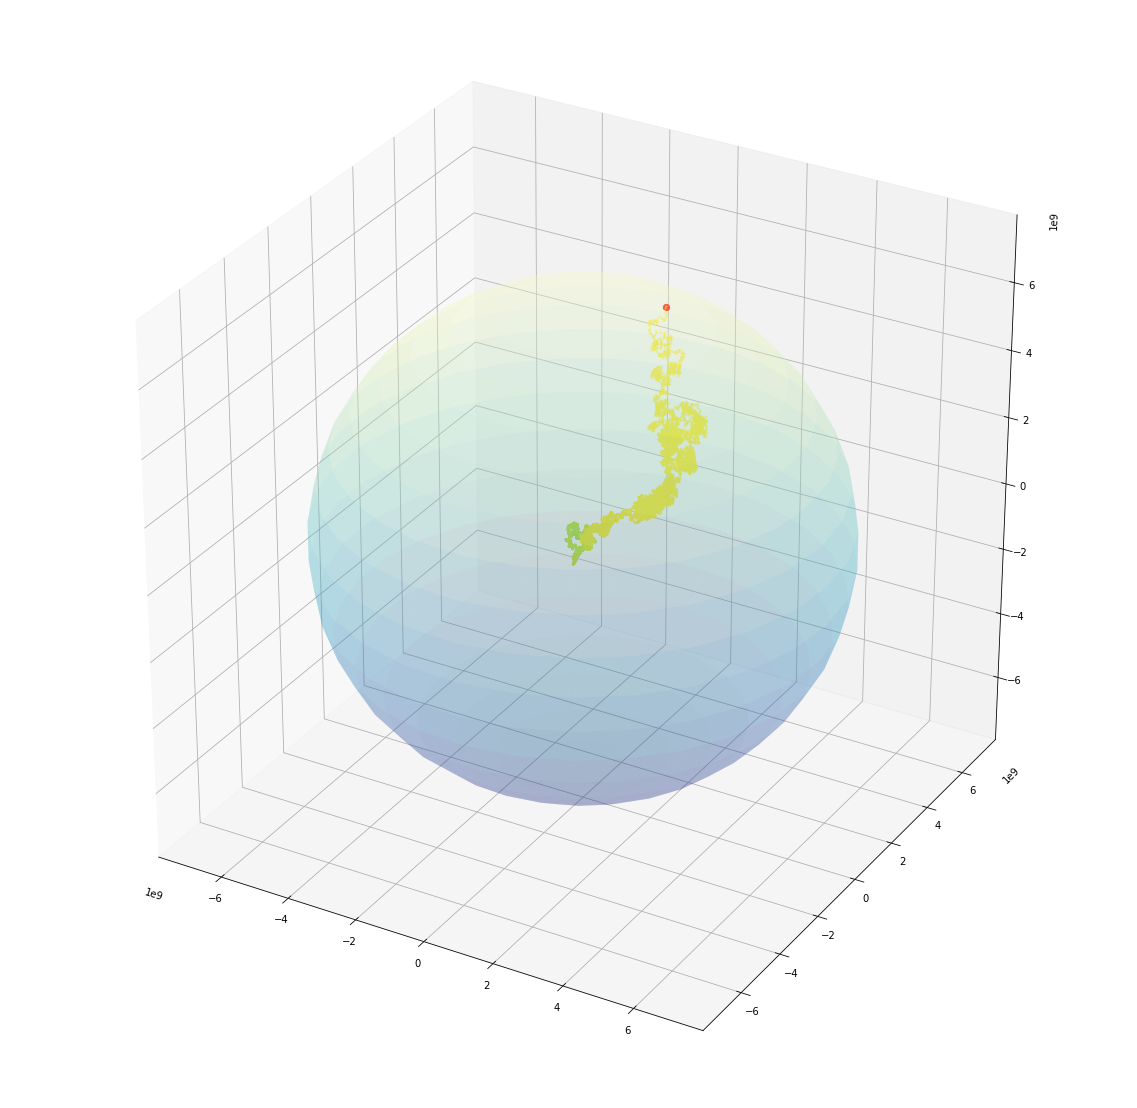

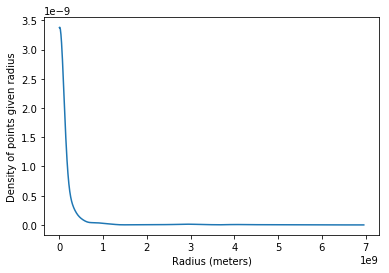

In [11]:
Sun_radius_ten = Sun_radius*10
x,y,z,d = Random_walk_lin(Sun_radius_ten)

plotting_3d(x,y,z,Sun_radius_ten)
plotting_kde(d,Sun_radius_ten)

Now, what if we look at the LARGEST star, by radius?  Stephenson 2-18 has a radius of 2,150 $R_{sun}$.

Start Mean free path distance : 69.57
Final distance traveled (Sun Radius) : 1468807.27953
Time Elapsed (seconds) : 3406164.08123
Final iterations : 1241455


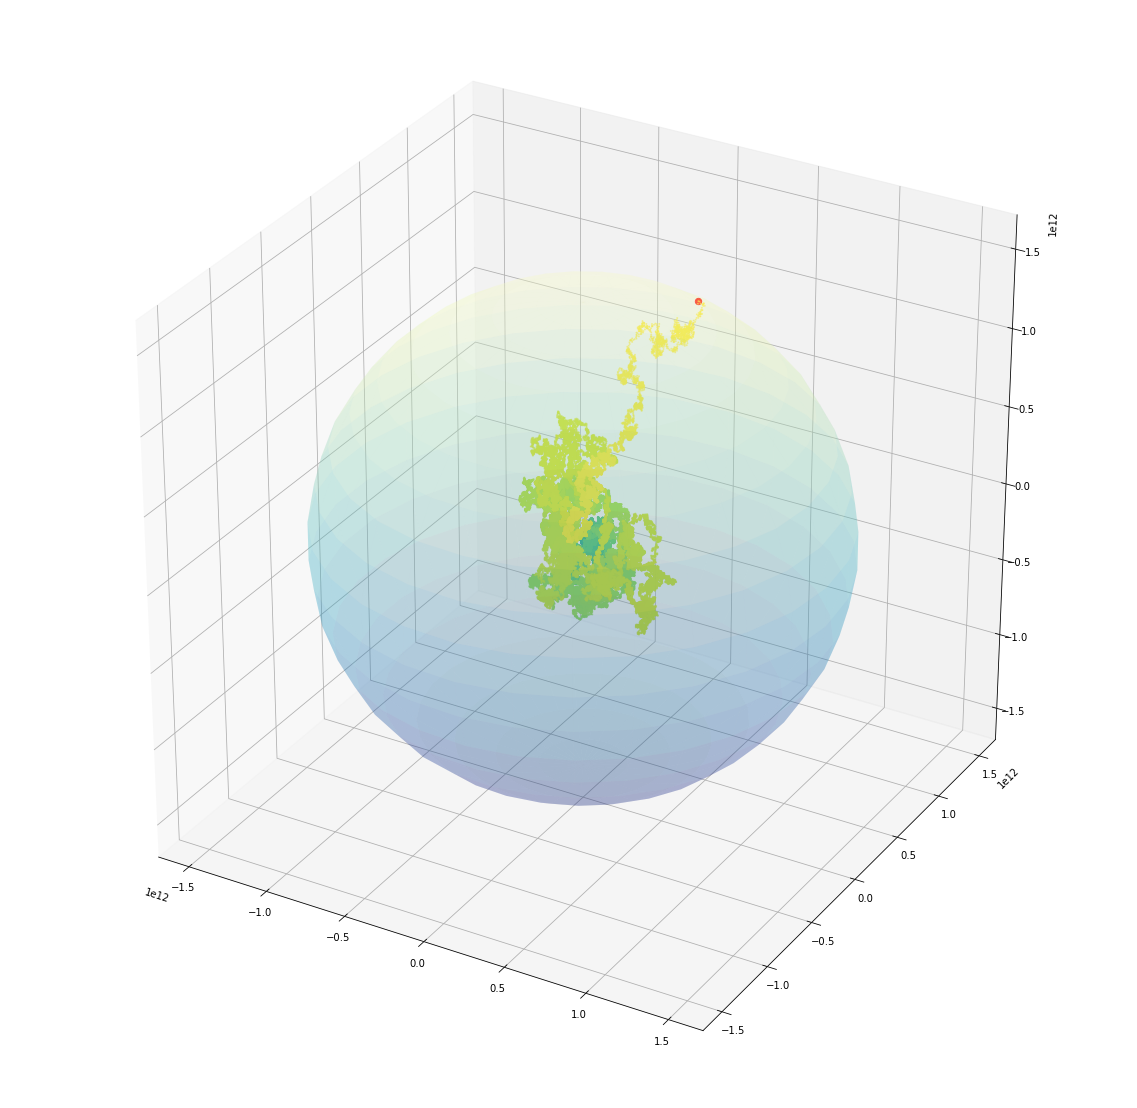

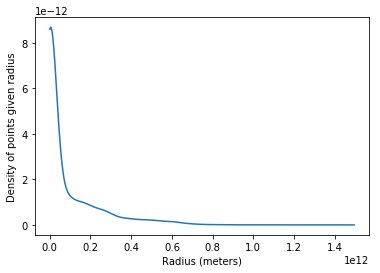

In [12]:
Sun_radius_large = Sun_radius*2150
x,y,z,d = Random_walk_lin(Sun_radius_large)

plotting_3d(x,y,z,Sun_radius_large)
plotting_kde(d,Sun_radius_large)

Now, in reality, these are all charicatures of how long these processes would actually take, as we had to GREATLY increase the mean free path in order for this calculation to be done in a reasonable amount of time!  In reality, the mean free path for our sun is approximately a centimeter, and a photon will take approximately 100,000-1,000,000 years to go from creation in the center of the sun to finally escaping the sun's surface.   